# Assignment 6
### Phyllis Kho

Import Numpy, Pandas and Matplotlib and set the display options.

Use the following code to load a CSV file of the NOAA IBTrACS hurricane dataset:

url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()
Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

How many rows does this dataset have?

How many North Atlantic hurricanes are in this dataset?

In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [68]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


In [69]:
df

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
716321,2024076S13137,2024,19,SP,EA,MEGAN,2024-03-18 06:00:00,NR,-16.0000,136.7000,NaN,NaN
716322,2024076S13137,2024,19,SP,EA,MEGAN,2024-03-18 09:00:00,NR,-16.1801,136.5190,NaN,NaN
716323,2024076S13137,2024,19,SP,EA,MEGAN,2024-03-18 12:00:00,NR,-16.3393,136.3200,NaN,NaN
716324,2024076S13137,2024,19,SP,EA,MEGAN,2024-03-18 15:00:00,NR,-16.4760,136.1120,NaN,NaN


This dataset has 716314 rows.

In [70]:
df[df['BASIN'] == 'NA'].count()

SID         126593
SEASON      126593
NUMBER      126593
BASIN       126593
SUBBASIN    126593
NAME         53502
ISO_TIME    126593
NATURE      126593
LAT         126593
LON         126593
WMO_WIND     53955
WMO_PRES     22975
dtype: int64

In [71]:
df[df['BASIN'] == 'NA'].SID.nunique()

2345

In [72]:
df[df['BASIN'] == 'NA'].NAME.nunique()

306

There are 126593 North Atlantic hurricanes in this dataset, and 2345 unique hurricanes, but only 306 uniquely named hurricanes.

## 1) Get the unique values of the BASIN, SUBBASIN, and NATURE columns

In [73]:
df['BASIN'].unique()

array(['NI', 'SI', 'NA', 'EP', 'WP', 'SP', 'SA'], dtype=object)

In [74]:
df['SUBBASIN'].unique()

array(['BB', 'AS', 'MM', 'GM', 'NA', 'CS', 'WA', 'EA', 'CP'], dtype=object)

In [75]:
df['NATURE'].unique()

array(['NR', 'TS', 'ET', 'SS', 'MX', 'DS'], dtype=object)

## 2) Rename the WMO_WIND and WMO_PRES columns to WIND and PRES

In [76]:
# Provide a dictionary to .rename(columns={}) where keys are the old column names and values are the new column names.
# inplace=True is to make the change to df instead of defining a new dataframe.

df.rename(columns={'WMO_WIND': 'WIND', 'WMO_PRES': 'PRES'}, inplace=True)

In [77]:
# Check that column has been renamed
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


## 3) Get the 10 largest rows in the dataset by WIND
You will notice some names are repeated.

In [78]:
df.nlargest(10, 'WIND')

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
666142,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
666140,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
666144,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
427655,1980214N11330,1980,57,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
178210,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 00:00:00,TS,24.6,-80.5,160.0,892.0
178211,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 02:00:00,TS,24.8,-80.8,160.0,892.0
178213,1935241N23291,1935,46,NA,GM,NaN,1935-09-03 06:00:00,TS,25.1,-81.1,160.0,NaN
482093,1988253N12306,1988,74,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,160.0,888.0
552477,1997253N12255,1997,81,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,160.0,902.0
605764,2005289N18282,2005,97,NA,CS,WILMA,2005-10-19 12:00:00,TS,17.3,-82.8,160.0,882.0


## 4) Group the data on SID and get the 10 largest hurricanes by WIND

In [79]:
df.groupby('SID').max().WIND.nlargest(10)

SID
2015293N13266    185.0
1980214N11330    165.0
1935241N23291    160.0
1988253N12306    160.0
1997253N12255    160.0
2005289N18282    160.0
2019236N10314    160.0
1998295N12284    155.0
2005261N21290    155.0
2009288N07267    155.0
Name: WIND, dtype: float64

## 5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

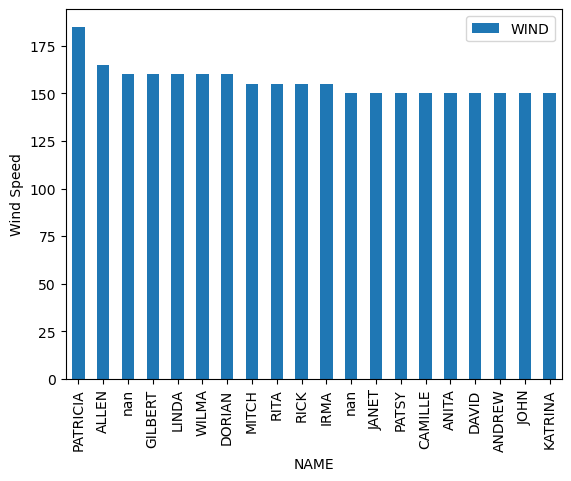

In [80]:
#df_sorted = df.sort_values(by='WIND', ascending=False)
#df_sorted = df_sorted.groupby('NAME').max()
#top_20_df_sorted = df_sorted.WIND.head(20)
#top_20_df_sorted
#top_20_df_sorted.set_index('NAME').WIND.plot(kind='bar');

#df.groupby('NAME').max().sort_values(by='WIND', ascending=False).WIND.head(20).plot(kind='bar', ylabel='Wind Speed');

df.groupby('SID').max().nlargest(20, 'WIND').plot(kind='bar', ylabel='Wind Speed', x='NAME', y='WIND');

## 6) Plot the count of all datapoints by Basin
as a bar chart

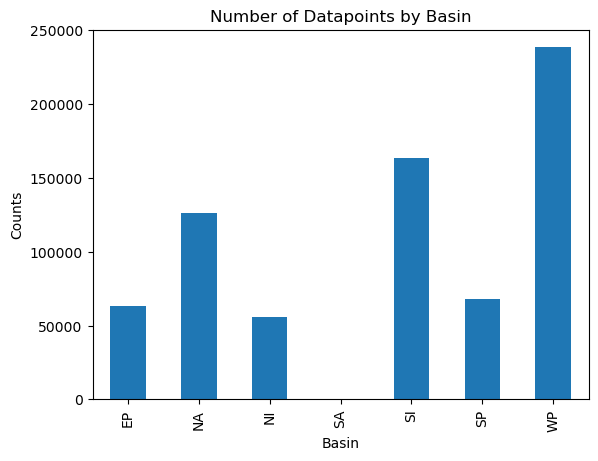

In [81]:
df.groupby('BASIN').SID.count().plot(kind='bar', 
                                     ylabel='Counts', 
                                     xlabel='Basin',
                                    title='Number of Datapoints by Basin');

## 7) Plot the count of unique hurricanes by Basin
as a bar chart.

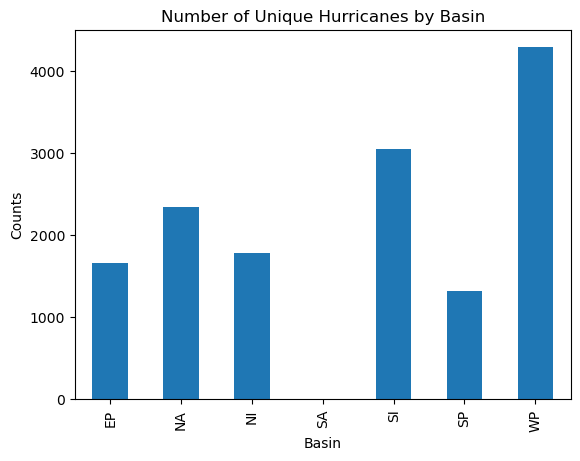

In [82]:
df.groupby('BASIN').SID.nunique().plot(kind='bar', 
                                       ylabel='Counts', 
                                       xlabel='Basin',
                                       title='Number of Unique Hurricanes by Basin');

## 8) Make a hexbin of the location of datapoints in Latitude and Longitude

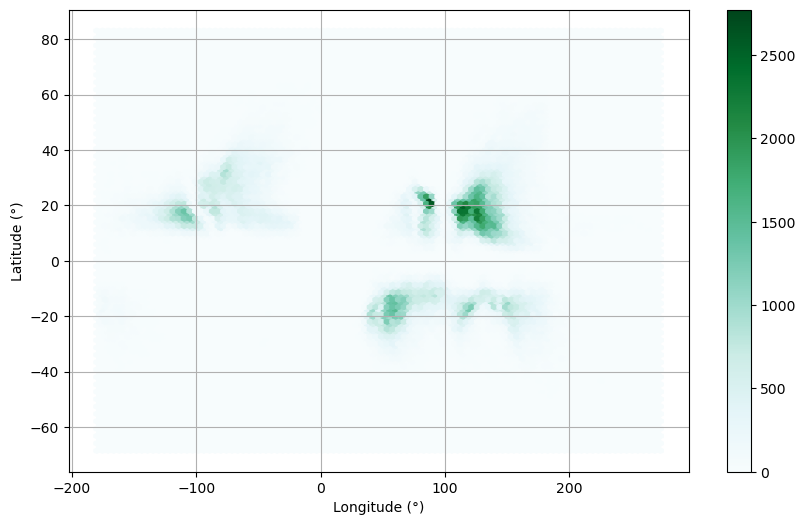

In [83]:
df.plot.hexbin(x='LON',
               y='LAT',
               xlabel='Longitude (°)',
               ylabel='Latitude (°)',
               grid=True,
               figsize=(10,6));

## 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot
First find the SID of this hurricane.

Next get this hurricane’s group and plot its position as a scatter plot. Use wind speed to color the points.

In [84]:
# Extract all Katrina data only
df_katrina = df[(df.NAME=='KATRINA')]
df_katrina

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
332516,1967242N18253,1967,86,EP,MM,KATRINA,1967-08-30 00:00:00,TS,17.8000,-107.2000,45.0,NaN
332517,1967242N18253,1967,86,EP,MM,KATRINA,1967-08-30 03:00:00,TS,17.9859,-107.5960,NaN,NaN
332518,1967242N18253,1967,86,EP,MM,KATRINA,1967-08-30 06:00:00,TS,18.2120,-107.9900,45.0,NaN
332519,1967242N18253,1967,86,EP,MM,KATRINA,1967-08-30 09:00:00,TS,18.5131,-108.3860,NaN,NaN
332520,1967242N18253,1967,86,EP,MM,KATRINA,1967-08-30 12:00:00,TS,18.9000,-108.8000,45.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
603822,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 18:00:00,TS,37.0000,-87.0000,30.0,990.0
603823,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 21:00:00,TS,37.7916,-86.2537,NaN,NaN
603824,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 00:00:00,ET,38.6000,-85.3000,30.0,994.0
603825,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 03:00:00,ET,39.3681,-84.1578,NaN,NaN


The SID of Hurricane Katrina is 2005236N23285.

In [85]:
# Extract all 2005 Katrina hurricanes
df_katrina_2005 = df_katrina[(df_katrina.SEASON==2005)]
df_katrina_2005

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
603763,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 18:00:00,TS,23.1000,-75.1000,30.0,1008.0
603764,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 21:00:00,TS,23.2476,-75.4049,NaN,NaN
603765,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 00:00:00,TS,23.4000,-75.7000,30.0,1007.0
603766,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 03:00:00,TS,23.5700,-75.9726,NaN,NaN
603767,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 06:00:00,TS,23.8000,-76.2000,30.0,1007.0
...,...,...,...,...,...,...,...,...,...,...,...,...
603822,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 18:00:00,TS,37.0000,-87.0000,30.0,990.0
603823,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-30 21:00:00,TS,37.7916,-86.2537,NaN,NaN
603824,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 00:00:00,ET,38.6000,-85.3000,30.0,994.0
603825,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-31 03:00:00,ET,39.3681,-84.1578,NaN,NaN


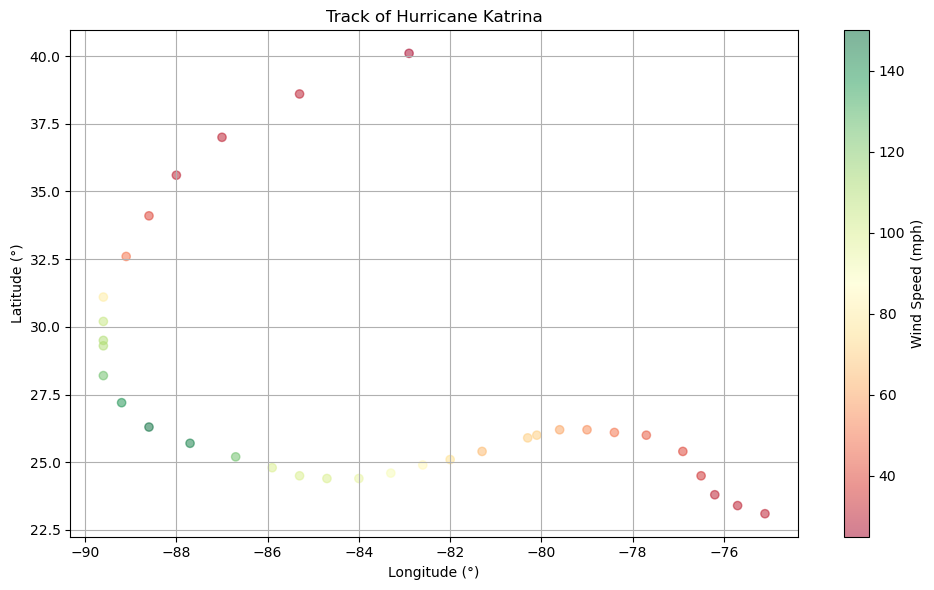

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df_katrina_2005['LON'], y=df_katrina_2005['LAT'], c=df_katrina_2005['WIND'], cmap='RdYlGn', alpha=0.5)
plt.colorbar(label='Wind Speed (mph)')
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title('Track of Hurricane Katrina')
plt.grid(True)
plt.tight_layout()

## 10) Make time the index on your dataframe

In [87]:
df.set_index('ISO_TIME', inplace=True)
df

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1842-10-25 03:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.9000,80.3000,NaN,NaN
1842-10-25 06:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8709,79.8265,NaN,NaN
1842-10-25 09:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8431,79.3524,NaN,NaN
1842-10-25 12:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8188,78.8772,NaN,NaN
1842-10-25 15:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8000,78.4000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-18 06:00:00,2024076S13137,2024,19,SP,EA,MEGAN,NR,-16.0000,136.7000,NaN,NaN
2024-03-18 09:00:00,2024076S13137,2024,19,SP,EA,MEGAN,NR,-16.1801,136.5190,NaN,NaN
2024-03-18 12:00:00,2024076S13137,2024,19,SP,EA,MEGAN,NR,-16.3393,136.3200,NaN,NaN


## 11) Plot the count of all datapoints per year as a timeseries
You should use resample

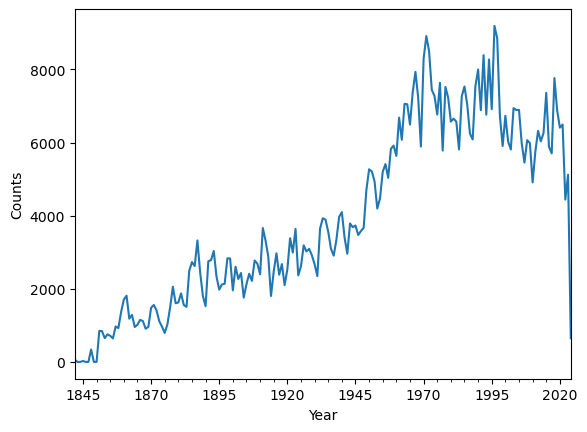

In [192]:
df.resample('YE').size().plot(xlabel='Year', 
                              ylabel='Counts'
                             );

## 12) Plot all tracks from the North Atlantic in 2005
You will probably have to iterate through a GroupBy object

In [194]:
# Extract all 2005 NA hurricanes
NA_2005 = df[(df['BASIN'] == 'NA') & (df['SEASON'] == 2005)]
NA_2005

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
ISO_TIME,,,,,,,,,,,
2005-06-08 18:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,16.9000,-84.0000,25.0,1004.0
2005-06-08 21:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,17.1200,-83.9425,NaN,NaN
2005-06-09 00:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,17.4000,-83.9000,30.0,1003.0
2005-06-09 03:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,17.7775,-83.8850,NaN,NaN
2005-06-09 06:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,18.2000,-83.9000,35.0,1003.0
...,...,...,...,...,...,...,...,...,...,...,...
2006-01-07 06:00:00,2005364N24324,2005,115,NA,NA,ZETA,DS,24.2000,-52.7000,25.0,1012.0
2006-01-07 09:00:00,2005364N24324,2005,115,NA,NA,ZETA,DS,24.4249,-53.4364,NaN,NaN
2006-01-07 12:00:00,2005364N24324,2005,115,NA,NA,ZETA,DS,24.8000,-54.2000,25.0,1014.0


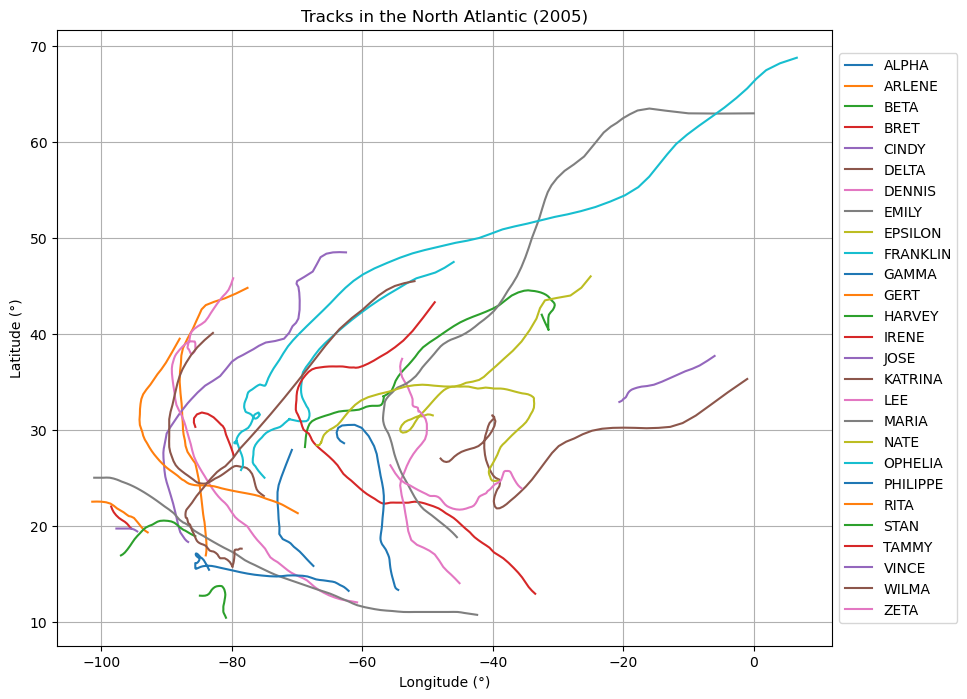

In [234]:
NA_2005_NAME = NA_2005.groupby('NAME')

plt.figure(figsize=(10, 8))

for name, group in NA_2005_NAME:
    plt.plot(group['LON'], group['LAT'], label=name)

plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title('Tracks in the North Atlantic (2005)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

# Where did nan hurricane go?

## 13) Create a filtered dataframe that contains only data since 1970 from the North Atlantic (“NA”) Basin
Use this for the rest of the assignment

In [23]:
NA_after1970 = df[(df['BASIN'] == 'NA') & (df['SEASON'] >= 1970)]

In [24]:
NA_after1970

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1970-05-17 18:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.5000,-79.0000,25.0,NaN
1970-05-17 21:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.6475,-79.1400,NaN,NaN
1970-05-18 00:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.8000,-79.3000,25.0,NaN
1970-05-18 03:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.9575,-79.4925,NaN,NaN
1970-05-18 06:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,12.1000,-79.7000,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-17 12:00:00,2023319N11282,2023,80,NA,CS,NaN,NR,17.0364,-79.8000,NaN,NaN
2023-11-17 15:00:00,2023319N11282,2023,80,NA,CS,NaN,NR,17.4991,-79.1718,NaN,NaN
2023-11-17 18:00:00,2023319N11282,2023,80,NA,CS,NaN,NR,18.0000,-78.5000,NaN,NaN


## 14) Plot the number of datapoints per day from this filtered dataframe
Make sure you figure is big enough to actually see the plot

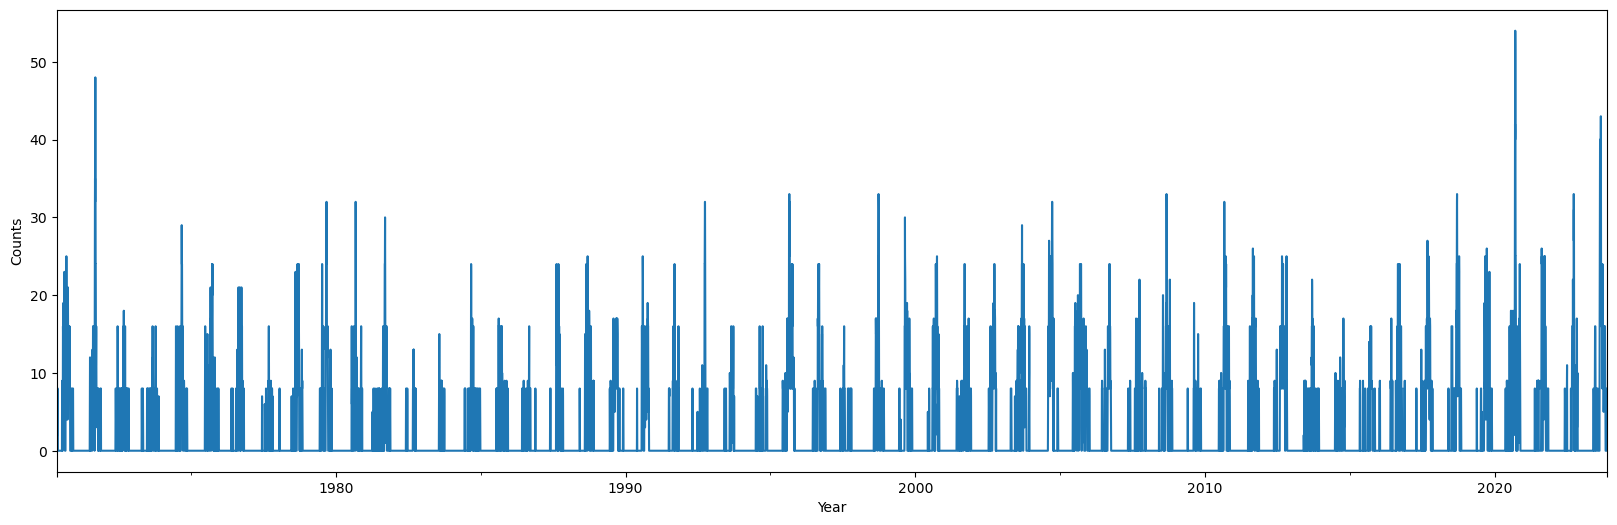

In [96]:
NA_after1970.resample('D').size().plot(figsize=(20,6), xlabel='Year', ylabel='Counts');

## 15) Calculate the climatology of datapoint counts as a function of dayofyear
Plot the mean and standard deviation on a single figure

In [107]:
# Calculate the mean and SD of wind speed for each day of the year.
WIND_mean_dayofyear = NA_after1970.groupby(NA_after1970.index.dayofyear).WIND.mean()
WIND_std_dayofyear = NA_after1970.groupby(NA_after1970.index.dayofyear).WIND.std()

In [109]:
# Calculate the mean and SD of pressure for each day of the year.
PRES_mean_dayofyear = NA_after1970.groupby(NA_after1970.index.dayofyear).PRES.mean()
PRES_std_dayofyear = NA_after1970.groupby(NA_after1970.index.dayofyear).PRES.std()

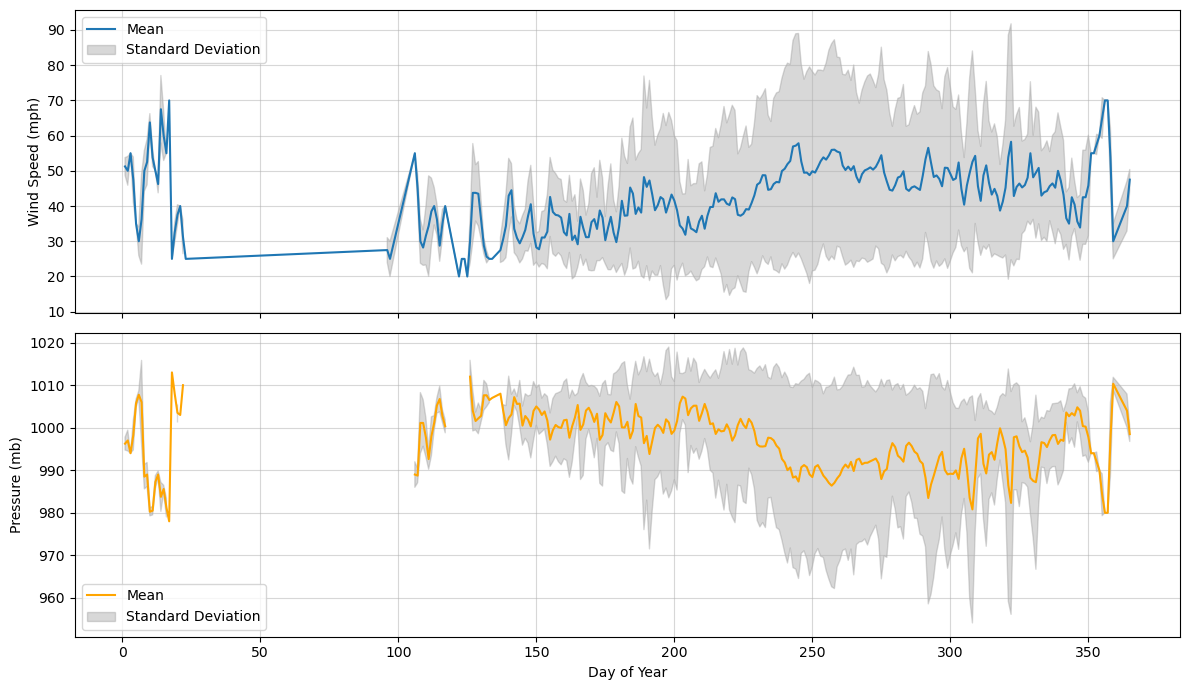

In [123]:
fig, ax = plt.subplots(figsize=(12,7), nrows=2, sharex=True)

ax[0].plot(WIND_mean_dayofyear, label='Mean');
ax[0].fill_between(WIND_mean_dayofyear.index, 
                 WIND_mean_dayofyear - WIND_std_dayofyear, 
                 WIND_mean_dayofyear + WIND_std_dayofyear, 
                 color='gray', alpha=0.3, label='Standard Deviation')
ax[0].set_ylabel('Wind Speed (mph)');
ax[0].legend(loc='upper left')
ax[0].grid(alpha=0.5)

ax[1].plot(PRES_mean_dayofyear, label='Mean', color='orange');
ax[1].fill_between(PRES_mean_dayofyear.index, 
                 PRES_mean_dayofyear - PRES_std_dayofyear, 
                 PRES_mean_dayofyear + PRES_std_dayofyear, 
                 color='gray', alpha=0.3, label='Standard Deviation')
ax[1].set_ylabel('Pressure (mb)');
ax[1].set_xlabel('Day of Year');
ax[1].legend()
ax[1].grid(alpha=0.5)

plt.tight_layout()


## 16) Use transform to calculate the anomaly of daily counts from the climatology
Resample the anomaly timeseries at annual resolution and plot a line with dots as markers.

Which years stand out as having anomalous hurricane activity?

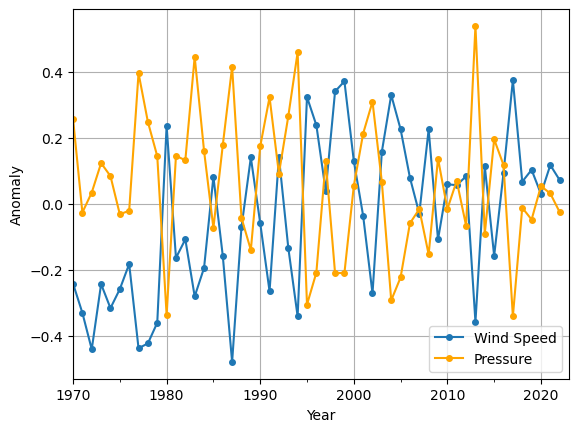

In [185]:
# Create a new column in NA_after1970 called Day_of_Year, containing day of year of each row. 
NA_after1970.loc[:, 'Day_of_Year'] = NA_after1970.index.dayofyear

# Define a function to calculate anomaly
def standardize(x):
    return (x - x.mean())/x.std()

# Calculate wind speed anomalies for each day of the year
WIND_anomaly_NA_after1970 = NA_after1970.groupby('Day_of_Year').WIND.transform(standardize)

# Resample on an annual time scale and calculate the mean wind speed anomaly value for each year.
annual_WIND_anomaly_NA_after1970 = WIND_anomaly_NA_after1970.resample('YE').mean()

# Calculate pressure anomalies for each day of the year
PRES_anomaly_NA_after1970 = NA_after1970.groupby('Day_of_Year').PRES.transform(standardize)

# Resample on an annual time scale and calculate the mean pressure anomaly value for each year.
annual_PRES_anomaly_NA_after1970 = PRES_anomaly_NA_after1970.resample('YE').mean()

# Plot annual anomalies for wind speed and pressure on the same figure
annual_WIND_anomaly_NA_after1970.plot(marker='o', grid=True, label='Wind Speed', markersize=4);
annual_PRES_anomaly_NA_after1970.plot(marker='o', grid=True, label='Pressure', markersize=4, color ='orange');
plt.xlabel('Year');
plt.ylabel('Anomaly');
plt.legend();

In [208]:
# I define "hurricanes with anomalous hurricane activity" as hurricanes with wind speed and pressure anomalies > 0.4 or <-0.4.

In [209]:
# Years in which wind speed or pressure anomalies are greater than 0.4
years_positive_anomalous_activity = annual_WIND_anomaly_NA_after1970[(annual_WIND_anomaly_NA_after1970 > 0.4) | (annual_PRES_anomaly_NA_after1970 > 0.4)].index 

# Years in which wind speed or pressure anomalies are lesser than 0.4
years_negative_anomalous_activity = annual_WIND_anomaly_NA_after1970[(annual_WIND_anomaly_NA_after1970 < -0.4) | (annual_PRES_anomaly_NA_after1970 <- 0.4)].index 

In [210]:
years_positive_anomalous_activity

DatetimeIndex(['1983-12-31', '1987-12-31', '1994-12-31', '2013-12-31'], dtype='datetime64[ns]', name='ISO_TIME', freq=None)

In [211]:
years_negative_anomalous_activity

DatetimeIndex(['1972-12-31', '1977-12-31', '1978-12-31', '1987-12-31'], dtype='datetime64[ns]', name='ISO_TIME', freq=None)

Therefore, years with anomalous hurricane activity are 1983, 1987, 1994, 2013, 1972, 1977, 1978 and 1987.